In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import *


from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import NearMiss


import os

c:\anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
c:\anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '

In [2]:
data = pd.read_excel('dataset.xlsx')
data.head()

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,0,0,0,0.236515,-0.02234,-0.517413,0.010677,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f7d619a94f97c45,5,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,d9e41465789c2b5,15,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
data.shape

(5644, 111)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5644 entries, 0 to 5643
Columns: 111 entries, Patient ID to ctO2 (arterial blood gas analysis)
dtypes: float64(70), int64(4), object(37)
memory usage: 4.8+ MB


In [5]:
data.columns

Index(['Patient ID', 'Patient age quantile', 'SARS-Cov-2 exam result',
       'Patient addmited to regular ward (1=yes, 0=no)',
       'Patient addmited to semi-intensive unit (1=yes, 0=no)',
       'Patient addmited to intensive care unit (1=yes, 0=no)', 'Hematocrit',
       'Hemoglobin', 'Platelets', 'Mean platelet volume ',
       ...
       'Hb saturation (arterial blood gases)',
       'pCO2 (arterial blood gas analysis)',
       'Base excess (arterial blood gas analysis)',
       'pH (arterial blood gas analysis)',
       'Total CO2 (arterial blood gas analysis)',
       'HCO3 (arterial blood gas analysis)',
       'pO2 (arterial blood gas analysis)', 'Arteiral Fio2', 'Phosphor',
       'ctO2 (arterial blood gas analysis)'],
      dtype='object', length=111)

In [6]:
data.isnull().sum()

Patient ID                                                  0
Patient age quantile                                        0
SARS-Cov-2 exam result                                      0
Patient addmited to regular ward (1=yes, 0=no)              0
Patient addmited to semi-intensive unit (1=yes, 0=no)       0
                                                         ... 
HCO3 (arterial blood gas analysis)                       5617
pO2 (arterial blood gas analysis)                        5617
Arteiral Fio2                                            5624
Phosphor                                                 5624
ctO2 (arterial blood gas analysis)                       5617
Length: 111, dtype: int64

In [7]:
null_columns = np.where(data.isna().sum() > 0)[0]
prop = (len(null_columns) / data.shape[1])*100    
prop

94.5945945945946

In [8]:
pd.value_counts(data['SARS-Cov-2 exam result'])

negative    5086
positive     558
Name: SARS-Cov-2 exam result, dtype: int64

Class 0: 0.9011339475549256
Class 1: 0.09886605244507442
Proportion: 0.11 : 1


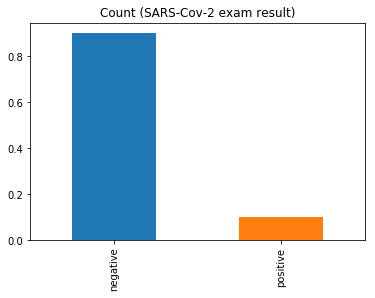

In [9]:
exam_result_count = data['SARS-Cov-2 exam result'].value_counts(normalize=True)
print('Class 0:', exam_result_count[0])
print('Class 1:', exam_result_count[1])
print('Proportion:', round(exam_result_count[1] / exam_result_count[0], 2), ': 1')

exam_result_count.plot(kind='bar', title='Count (SARS-Cov-2 exam result)',color = ['#1F77B4', '#FF7F0E']);

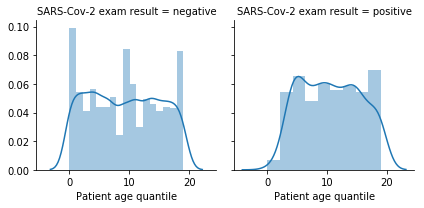

In [10]:
import seaborn as sns
g = sns.FacetGrid(data, col='SARS-Cov-2 exam result')
g = g.map(sns.distplot, "Patient age quantile")

In [11]:
# explorando a distribuição das idades
data["SARS-Cov-2 exam result"] = data["SARS-Cov-2 exam result"].replace('negative',0)
data["SARS-Cov-2 exam result"] = data["SARS-Cov-2 exam result"].replace('positive',1)

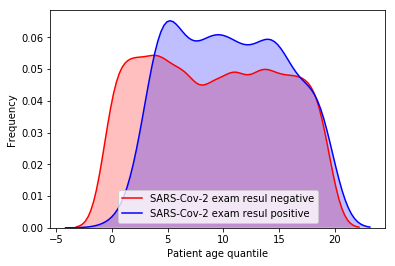

In [12]:
g = sns.kdeplot(data["Patient age quantile"][(data["SARS-Cov-2 exam result"] == 0) & (data["Patient age quantile"].notnull())], color="Red", shade = True)
g = sns.kdeplot(data["Patient age quantile"][(data["SARS-Cov-2 exam result"] == 1) & (data["Patient age quantile"].notnull())], ax =g, color="Blue", shade= True)
g.set_xlabel("Patient age quantile")
g.set_ylabel("Frequency")
g = g.legend(["SARS-Cov-2 exam resul negative","SARS-Cov-2 exam resul positive"])

In [13]:
data.groupby("SARS-Cov-2 exam result").count()

,Patient ID,Patient age quantile,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
SARS-Cov-2 exam result,,,,,,,,,,,,,,,,,,,,,
0,5086,5086,5086,5086,5086,520,520,519,518,519,...,14,14,14,14,14,14,14,11,19,14
1,558,558,558,558,558,83,83,83,81,83,...,13,13,13,13,13,13,13,9,1,13


In [14]:
data.groupby('SARS-Cov-2 exam result').count().iloc[:,list(set(np.where(data.groupby('SARS-Cov-2 exam result').count() > 300)[1]))]


,Patient ID,Patient age quantile,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,...,Parainfluenza 2,Neutrophils,Urea,Proteina C reativa mg/dL,Creatinine,Potassium,Sodium,"Influenza B, rapid test","Influenza A, rapid test",Strepto A
SARS-Cov-2 exam result,,,,,,,,,,,,,,,,,,,,,
0,5086,5086,5086,5086,5086,520,520,519,518,519,...,1240,438,338,436,362,313,312,758,758,318
1,558,558,558,558,558,83,83,83,81,83,...,112,75,59,70,62,58,58,62,62,14


In [15]:
data.groupby('SARS-Cov-2 exam result').count().iloc[:,list(set(np.where(data.groupby('SARS-Cov-2 exam result').count() > 500)[1]))].columns

Index(['Patient ID', 'Patient age quantile',
       'Patient addmited to regular ward (1=yes, 0=no)',
       'Patient addmited to semi-intensive unit (1=yes, 0=no)',
       'Patient addmited to intensive care unit (1=yes, 0=no)', 'Hematocrit',
       'Hemoglobin', 'Platelets', 'Mean platelet volume ', 'Red blood Cells',
       'Lymphocytes', 'Mean corpuscular hemoglobin concentration (MCHC)',
       'Leukocytes', 'Basophils', 'Mean corpuscular hemoglobin (MCH)',
       'Eosinophils', 'Mean corpuscular volume (MCV)', 'Monocytes',
       'Red blood cell distribution width (RDW)',
       'Respiratory Syncytial Virus', 'Influenza A', 'Influenza B',
       'Parainfluenza 1', 'CoronavirusNL63', 'Rhinovirus/Enterovirus',
       'Coronavirus HKU1', 'Parainfluenza 3', 'Chlamydophila pneumoniae',
       'Adenovirus', 'Parainfluenza 4', 'Coronavirus229E', 'CoronavirusOC43',
       'Inf A H1N1 2009', 'Bordetella pertussis', 'Metapneumovirus',
       'Parainfluenza 2', 'Influenza B, rapid test',
  

# Data Prep

In [16]:
df_x = data.drop([
    "Patient ID",
    'SARS-Cov-2 exam result',
    'Patient addmited to intensive care unit (1=yes, 0=no)',
    'Patient addmited to semi-intensive unit (1=yes, 0=no)',
    'Patient addmited to regular ward (1=yes, 0=no)',
    'Patient addmited to regular ward (1=yes, 0=no)'
], axis=1)

In [17]:
df_x['Urine - pH'].replace('Não Realizado', np.nan, inplace=True)

In [18]:
df_x['Urine - Leukocytes'].replace('<1000', '999', inplace=True)

In [19]:
df_x['Urine - pH'] = df_x['Urine - pH'].astype("float64")

In [20]:
df_x['Urine - Leukocytes'] = df_x['Urine - Leukocytes'].astype("float64")

In [21]:
df_x.dtypes[(df_x.dtypes == "object")].index

Index(['Respiratory Syncytial Virus', 'Influenza A', 'Influenza B',
       'Parainfluenza 1', 'CoronavirusNL63', 'Rhinovirus/Enterovirus',
       'Coronavirus HKU1', 'Parainfluenza 3', 'Chlamydophila pneumoniae',
       'Adenovirus', 'Parainfluenza 4', 'Coronavirus229E', 'CoronavirusOC43',
       'Inf A H1N1 2009', 'Bordetella pertussis', 'Metapneumovirus',
       'Parainfluenza 2', 'Influenza B, rapid test', 'Influenza A, rapid test',
       'Strepto A', 'Urine - Esterase', 'Urine - Aspect', 'Urine - Hemoglobin',
       'Urine - Bile pigments', 'Urine - Ketone Bodies', 'Urine - Nitrite',
       'Urine - Urobilinogen', 'Urine - Protein', 'Urine - Crystals',
       'Urine - Hyaline cylinders', 'Urine - Granular cylinders',
       'Urine - Yeasts', 'Urine - Color'],
      dtype='object')

In [22]:
df_x = pd.concat([df_x, pd.get_dummies(df_x[df_x.dtypes[(df_x.dtypes == "object")].index])], axis=1).drop(
    df_x.dtypes[(df_x.dtypes == "object")].index, axis=1).drop([
    'Respiratory Syncytial Virus_not_detected',
    'Influenza A_not_detected',
    'Influenza B_not_detected',
    'Parainfluenza 1_not_detected',
    'CoronavirusNL63_not_detected',
    'Rhinovirus/Enterovirus_not_detected',
    'Coronavirus HKU1_not_detected',
    'Parainfluenza 3_not_detected',
    'Chlamydophila pneumoniae_not_detected',
    'Adenovirus_not_detected',
    'Parainfluenza 4_not_detected',
    'Coronavirus229E_not_detected',
    'CoronavirusOC43_not_detected',
    'Inf A H1N1 2009_not_detected',
    'Bordetella pertussis_not_detected',
    'Metapneumovirus_not_detected',
    'Influenza B, rapid test_negative',
    'Influenza A, rapid test_negative',
    'Urine - Esterase_not_done',
    'Urine - Hemoglobin_not_done',
    'Urine - Hemoglobin_absent',
    'Strepto A_not_done',
    'Urine - Bile pigments_not_done',
    'Urine - Ketone Bodies_not_done',
    'Urine - Nitrite_not_done',
    'Urine - Urobilinogen_not_done',
    'Urine - Protein_not_done'
], axis=1)

In [23]:
df_x.dtypes[(df_x.dtypes == "float")].index

Index(['Hematocrit', 'Hemoglobin', 'Platelets', 'Mean platelet volume ',
       'Red blood Cells', 'Lymphocytes',
       'Mean corpuscular hemoglobin concentration (MCHC)', 'Leukocytes',
       'Basophils', 'Mean corpuscular hemoglobin (MCH)', 'Eosinophils',
       'Mean corpuscular volume (MCV)', 'Monocytes',
       'Red blood cell distribution width (RDW)', 'Serum Glucose',
       'Mycoplasma pneumoniae', 'Neutrophils', 'Urea',
       'Proteina C reativa mg/dL', 'Creatinine', 'Potassium', 'Sodium',
       'Alanine transaminase', 'Aspartate transaminase',
       'Gamma-glutamyltransferase ', 'Total Bilirubin', 'Direct Bilirubin',
       'Indirect Bilirubin', 'Alkaline phosphatase', 'Ionized calcium ',
       'Magnesium', 'pCO2 (venous blood gas analysis)',
       'Hb saturation (venous blood gas analysis)',
       'Base excess (venous blood gas analysis)',
       'pO2 (venous blood gas analysis)', 'Fio2 (venous blood gas analysis)',
       'Total CO2 (venous blood gas analysis)',
    

In [24]:
X_all = df_x
y_all = data['SARS-Cov-2 exam result']

X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size = 0.25 ,random_state = 79831)

print('Numero de observaçoes do treino:', len(X_train))
print('Numero de observaçoes da teste:',len(X_test))

Numero de observaçoes do treino: 4233
Numero de observaçoes da teste: 1411


In [25]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA



    
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
std = StandardScaler()
pca = PCA(n_components=80)    

X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)
X_train = std.fit_transform(X_train)
X_test = std.transform(X_test)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
    
    
pca.explained_variance_ratio_.sum()

0.9936283659781372

## SMOTE

In [116]:
smt = SMOTE(k_neighbors=7, random_state=42)
X_sampling, y_sampling = smt.fit_sample(X_train, y_train)

In [26]:
from sklearn.preprocessing import PolynomialFeatures

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics  import auc, roc_curve, roc_auc_score

In [27]:
import time
from sklearn.metrics  import average_precision_score, make_scorer, roc_curve,f1_score, precision_score, recall_score, fbeta_score, auc, roc_auc_score, accuracy_score, confusion_matrix, classification_report,precision_recall_curve

In [28]:
from scipy.stats import ks_2samp
def fit_and_print(model):
    y_pred = model.predict(X_test)
    print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))  
    print("Classification Report: \n", classification_report(y_test, y_pred))  
    print("Accuracy Score: ", accuracy_score(y_test, y_pred))   
    print("Recall Score:", recall_score(y_test, y_pred))
    print("AUC: ", roc_auc_score(y_test, y_pred))
    print("KS: ", ks_2samp(y_pred[y_test == 0], y_pred[y_test == 1]).statistic)

In [119]:
# from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state = 665)

params = {'n_estimators' : [50,80, 100],    
          'max_depth': [6,7,8,9],
          'max_features': [15,20,25],
          'min_samples_split' : [0.01,0.05]
         }

grid = GridSearchCV(estimator = clf,
                          param_grid = params,
#                           scoring = make_scorer(roc_auc_score),
                          cv = 10 
)

inicio = time.time()
grid.fit(X_sampling, y_sampling)
fim = time.time()

print(fim - inicio)

print(grid.best_score_)
classif_final_RF = grid.best_estimator_
print(grid.best_estimator_)
print(grid.best_params_)

1454.4876353740692
0.6796974919419477
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=9, max_features=25,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=0.01,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=665,
                       verbose=0, warm_start=False)
{'max_depth': 9, 'max_features': 25, 'min_samples_split': 0.01, 'n_estimators': 100}


In [126]:
fit_and_print(classif_final_RF)

Confusion Matrix: 
 [[531 743]
 [ 23 114]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.42      0.58      1274
           1       0.13      0.83      0.23       137

    accuracy                           0.46      1411
   macro avg       0.55      0.62      0.41      1411
weighted avg       0.88      0.46      0.55      1411

Accuracy Score:  0.4571226080793763
Recall Score: 0.8321167883211679
AUC:  0.6244571382736138
KS:  0.24891427654722753


In [121]:
mlp = MLPClassifier()

parameter_space = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['adaptive', 'constant'],
}

inicio = time.time()

clf_mlp = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=10)
clf_mlp.fit(X_sampling, y_sampling)

fim = time.time()

print(fim - inicio)

print(clf_mlp.best_score_)
classif_mlp = clf_mlp.best_estimator_
print(clf_mlp.best_estimator_)
print(clf_mlp.best_params_)

3038.395336866379
0.6663180290537077
MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(50, 50, 50), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)
{'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'constant', 'solver': 'adam'}


In [45]:
fit_and_print(classif_mlp)

NameError: name 'classif_mlp' is not defined

In [128]:
test_Survived_RF = pd.Series(classif_final_RF.predict(X_test), name="Random Forest")
test_Survived_MLP = pd.Series(classif_mlp.predict(X_test), name="Multi-Layer Perceptron")

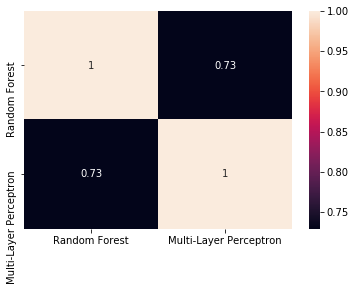

In [129]:
# Concatenate all classifier results
ensemble_results = pd.concat([test_Survived_RF,test_Survived_MLP],axis=1)
g= sns.heatmap(ensemble_results.corr(),annot=True)

In [131]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier

votingC = VotingClassifier(estimators=[('rfc', classif_final_RF), ('mlp', classif_mlp)], voting='soft', n_jobs=1)

votingC = votingC.fit(X_sampling,y_sampling)

In [132]:
fit_and_print(votingC)

Confusion Matrix: 
 [[547 727]
 [ 25 112]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.43      0.59      1274
           1       0.13      0.82      0.23       137

    accuracy                           0.47      1411
   macro avg       0.54      0.62      0.41      1411
weighted avg       0.88      0.47      0.56      1411

Accuracy Score:  0.4670446491849752
Recall Score: 0.8175182481751825
AUC:  0.6234373030514845
KS:  0.246874606102969


In [43]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    """Generate a simple plot of the test and training learning curve"""
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

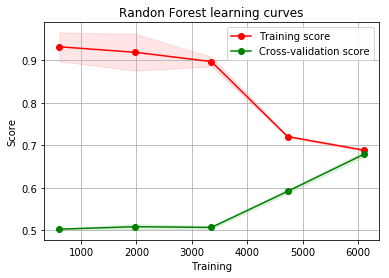

In [135]:
g = plot_learning_curve(classif_final_RF,"Randon Forest learning curves",X_sampling,y_sampling,cv=5)

## ADASYN

In [29]:
ady = ADASYN(random_state=42)
X_sampling_ady, y_sampling_ady = ady.fit_sample(X_train, y_train)

In [30]:
### SVC classifier
SVMC = SVC(probability=True)
svc_param_grid = {'kernel': ['rbf'], 
                  'gamma': [ 0.001, 0.01, 0.1, 1],
                  'C': [1, 10, 50, 100,200,300]}

gsSVMC = GridSearchCV(SVMC,param_grid = svc_param_grid, cv=10, n_jobs= 1, verbose = 1)

gsSVMC.fit(X_sampling_ady, y_sampling_ady)

SVMC_best = gsSVMC.best_estimator_

# Best score
gsSVMC.best_score_

Fitting 10 folds for each of 24 candidates, totalling 240 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed: 221.9min finished


0.6427933846697088

In [31]:
fit_and_print(SVMC_best)

Confusion Matrix: 
 [[534 740]
 [ 36 101]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.42      0.58      1274
           1       0.12      0.74      0.21       137

    accuracy                           0.45      1411
   macro avg       0.53      0.58      0.39      1411
weighted avg       0.86      0.45      0.54      1411

Accuracy Score:  0.4500354358610914
Recall Score: 0.7372262773722628
AUC:  0.578189276833698
KS:  0.15637855366739623


In [33]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

xgb1 = XGBClassifier()


xgb_param_grid = {'learning_rate': [0.05, 0.1, 0.2],
 'n_estimators': [150, 250, 350],
 'max_depth': [5, 10, 20],
 'min_child_weight': [0.4, 0.6, 0.8],
}

xgb = GridSearchCV(xgb1,param_grid = xgb_param_grid, cv=10, n_jobs= 1, verbose = 1)



xgb.fit(X_sampling_ady, y_sampling_ady)


xgb_best = xgb.best_estimator_

# Best score
print(xgb_best)

xgb.best_score_

c:\anaconda\lib\site-packages\dask\dataframe\utils.py:13: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  6.5min finished


XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.1, max_delta_step=0, max_depth=30,
              min_child_weight=15, missing=nan, monotone_constraints=None,
              n_estimators=600, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)


0.6641465327574967

In [34]:
fit_and_print(xgb_best)

Confusion Matrix: 
 [[648 626]
 [ 39  98]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.51      0.66      1274
           1       0.14      0.72      0.23       137

    accuracy                           0.53      1411
   macro avg       0.54      0.61      0.44      1411
weighted avg       0.86      0.53      0.62      1411

Accuracy Score:  0.5287030474840538
Recall Score: 0.7153284671532847
AUC:  0.611981345036611
KS:  0.22396269007322187


## ROS

In [35]:
from imblearn.over_sampling import RandomOverSampler
RandomOverSampler

ros = RandomOverSampler(random_state=45)
X_sampling_ros, y_sampling_ros = ros.fit_sample(X_train, y_train)

In [36]:
logreg = GridSearchCV(estimator = LogisticRegression(),
                          param_grid = {'C' : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'penalty' : ['l1', 'l2']},
                          cv = 10)
logreg.fit(X_sampling_ros,y_sampling_ros)

logreg_best = logreg.best_estimator_

# Best score
logreg.best_score_

c:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
c:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Incr

c:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_ms

c:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_ms

c:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_ms

c:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_ms

c:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_ms

c:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_ms

0.6113609078681679

In [37]:
fit_and_print(logreg_best)

Confusion Matrix: 
 [[696 578]
 [ 55  82]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.93      0.55      0.69      1274
           1       0.12      0.60      0.21       137

    accuracy                           0.55      1411
   macro avg       0.53      0.57      0.45      1411
weighted avg       0.85      0.55      0.64      1411

Accuracy Score:  0.5513819985825655
Recall Score: 0.5985401459854015
AUC:  0.5724254890052596
KS:  0.1448509780105192


In [40]:
#ExtraTrees 
# from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
# from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier

ExtC = ExtraTreesClassifier()


## Search grid for optimal parameters
ex_param_grid = {"max_depth": [10, 20, 30],
              "max_features": [20, 30, 50],
              "min_samples_split": [0.01,0.05],
              "min_samples_leaf": [10, 20, 30],
              "bootstrap": [False],
              "n_estimators" :[200,300, 400],
              "criterion": ["gini"]}


gsExtC = GridSearchCV(ExtC,param_grid = ex_param_grid, cv=10, n_jobs= 1, verbose = 1)

gsExtC.fit(X_sampling_ros,y_sampling_ros)

ExtC_best = gsExtC.best_estimator_

# Best score
gsExtC.best_score_

Fitting 10 folds for each of 162 candidates, totalling 1620 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1620 out of 1620 | elapsed: 132.9min finished


0.6798264895787108

In [41]:
fit_and_print(ExtC_best)

Confusion Matrix: 
 [[716 558]
 [ 46  91]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.56      0.70      1274
           1       0.14      0.66      0.23       137

    accuracy                           0.57      1411
   macro avg       0.54      0.61      0.47      1411
weighted avg       0.86      0.57      0.66      1411

Accuracy Score:  0.5719347980155918
Recall Score: 0.6642335766423357
AUC:  0.6131214978973061
KS:  0.22624299579461207


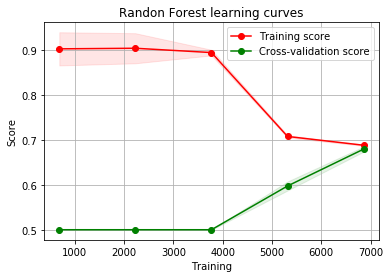

In [44]:
g = plot_learning_curve(ExtC_best,"ExtraTrees learning curves",X_sampling_ros,y_sampling_ros ,cv=10)

In [47]:
from sklearn.externals import joblib
import pickle

pickle.dump(imputer, open( "imputer.pickle", "wb" ))
pickle.dump(pca, open( "pca.pickle", "wb" ))
pickle.dump(std, open( "std.pickle", "wb" ))

filename_vot = 'ExtC_best.sav'
joblib.dump(ExtC_best, filename_vot)

['ExtC_best.sav']